# PLOTTING UNIFIED JSON

In [4]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


data=geopandas.read_file('final/complete.geojson')
data_pop=geopandas.read_file('final/gkz_pop+data.gpkg')


In [2]:
#why do i still  get comma values in legend?
data.sum_PE=data.sum_PE.astype('int')


<AxesSubplot:>

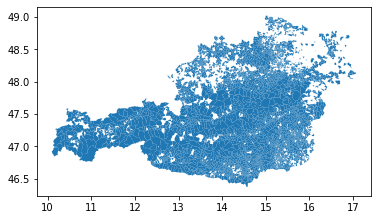

In [3]:
data.plot()

In [2]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [3]:
basemap=basemap[(basemap.BL!='Wien')&(basemap.BL!='Vorarlberg')&(basemap.BL!='Burgenland')]

In [5]:
#BLs=basemap.dissolve(by='BL')
#BLs.geometry.boundary.plot()
#BLs.to_file('plotting_data/BL_bounds.gpkg',driver='GPKG')
#GKZ=basemap.dissolve(by='GKZ')
#GKZ.to_file('plotting_data/GKZ_bounds.gpkg',driver='GPKG')


In [4]:
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')
no_data=BLs.set_index('BL').loc[['Burgenland','Vorarlberg','Wien']]

In [5]:
#add rows to show as nodata
data=data.append(no_data)
data_pop=data_pop.append(no_data)

In [41]:
len(data[data.sum_PE_tot>0])
len(data)

4408

Text(1.042, 0.04, 'no data')

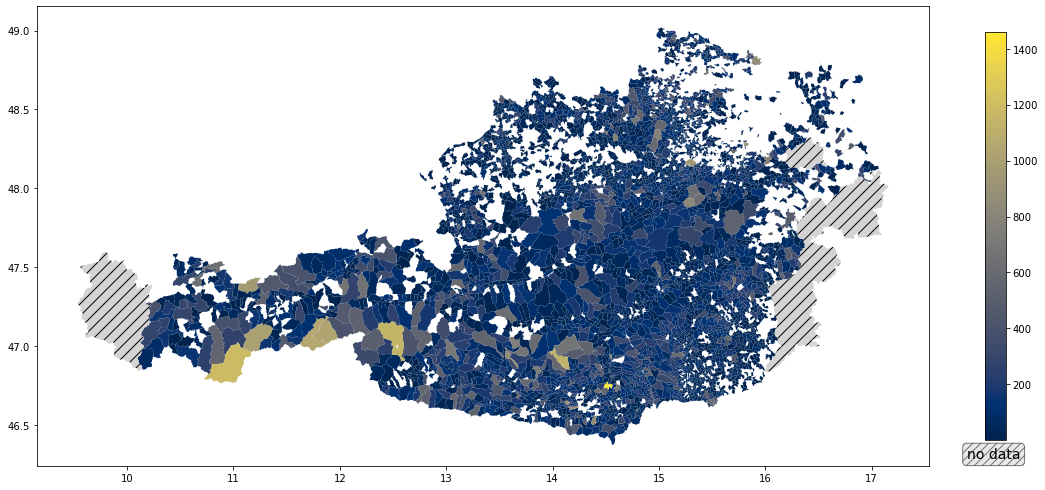

In [5]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
#GKZ.plot(color='grey',ax=ax,alpha=0.2)
data[data.sum_PE_tot>0].plot(column='sum_PE_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})
no_data.plot(color='lightgrey', hatch='//',ax=ax, legend=True)
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)


# KG resolution



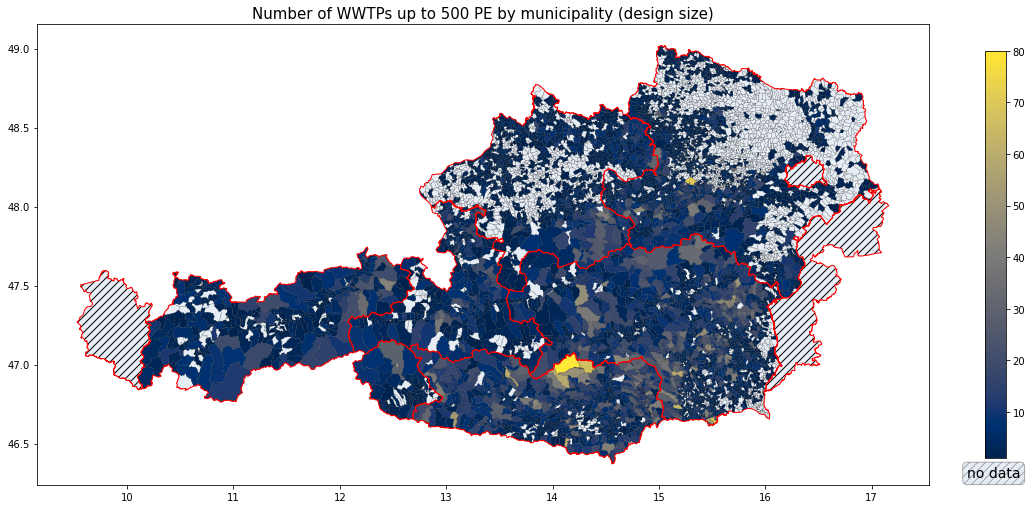

In [11]:
#plot for freq
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data[data.freq_tot>0].plot(column='freq_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/freq_all.png', bbox_inches='tight' )

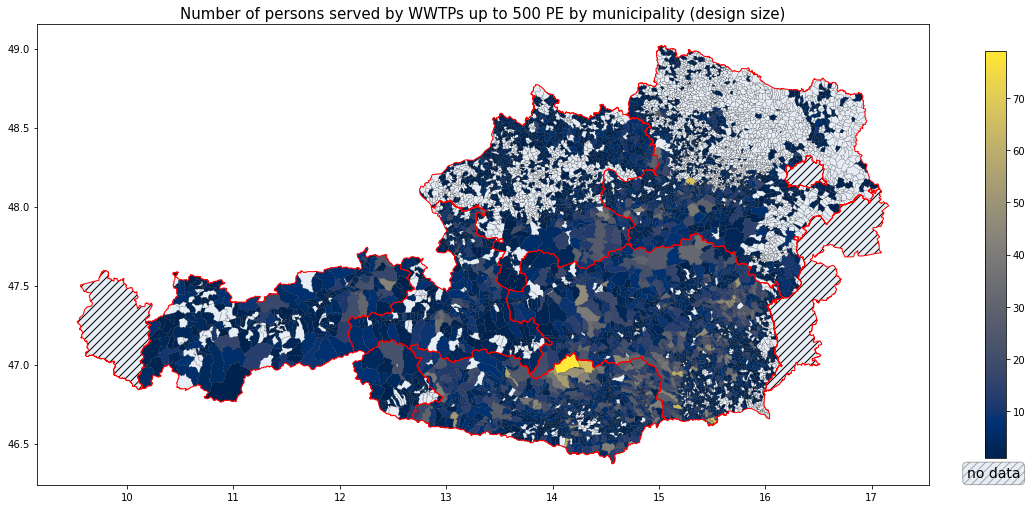

In [12]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of persons served by WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data[data.freq_small>0].plot(column='freq_small',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/freq_small.png', bbox_inches='tight' )

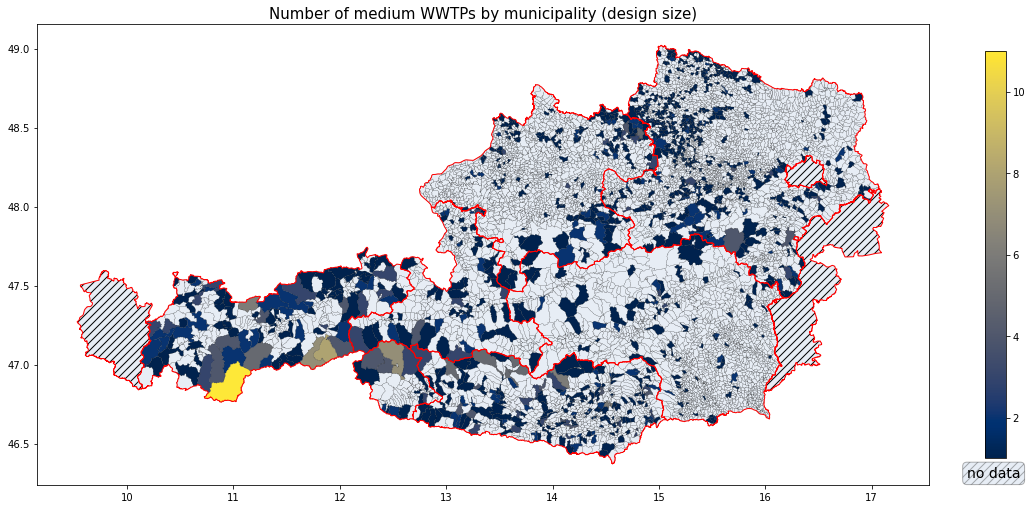

In [39]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of medium WWTPs by municipality (design size)', fontsize=15)
data[data.freq_medium>0].plot(column='freq_medium',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/freq_medium.png', bbox_inches='tight' )

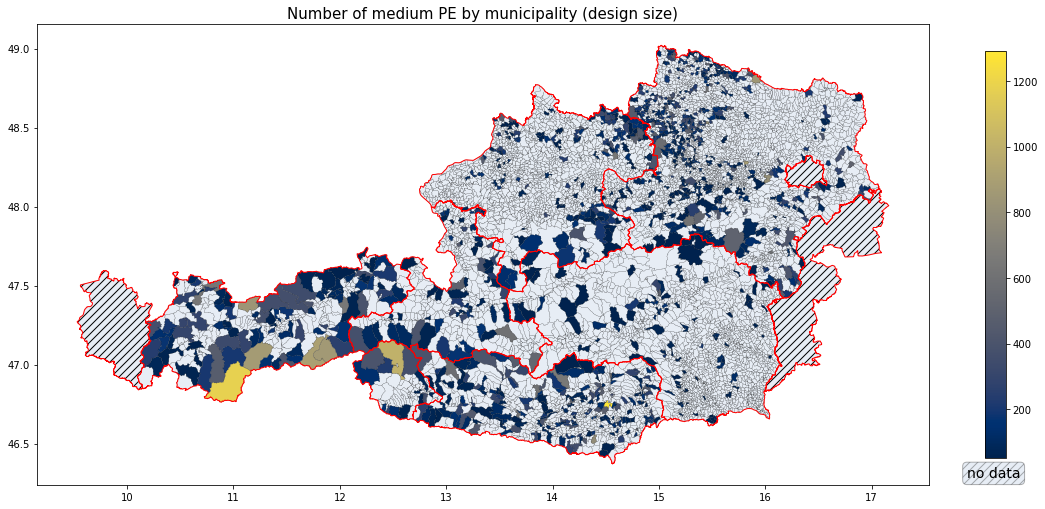

In [41]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of medium PE by municipality (design size)', fontsize=15)
data[data.sum_PE_medium>0].plot(column='sum_PE_medium',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/sum_PE_medium.png', bbox_inches='tight' )

<AxesSubplot:title={'center':'freq medium'}>

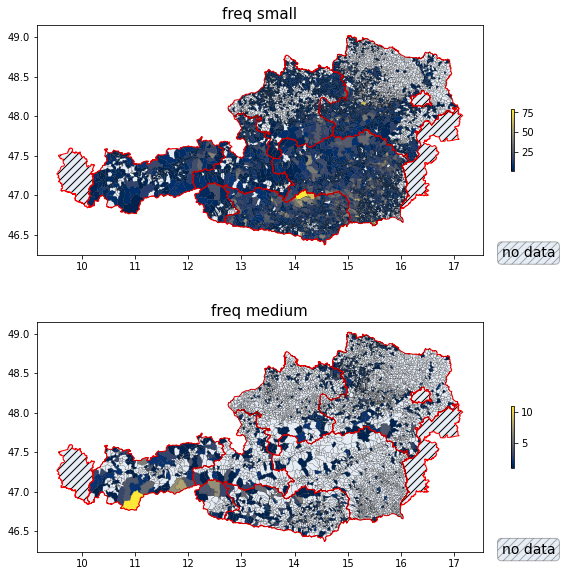

In [23]:
#plot for freq
fig,ax=plt.subplots(2,1,figsize=(10,10))


for axe in ax:
    basemap.plot(color='lightsteelblue',ax=axe, alpha=0.3)
    no_data.plot(hatch='///',ax=axe,alpha=0.3,color='lightsteelblue')
    #print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)
    props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
    fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=axe.transAxes)
    #plot KG boundaries
    basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=axe)


ax[0].set_title('freq small', fontsize=15)
ax[1].set_title('freq medium', fontsize=15)

data[data.freq_small>0].plot(column='freq_small',cmap='cividis', ax=ax[0], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good
data[data.freq_medium>0].plot(column='freq_medium',cmap='cividis', ax=ax[1], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good




plt.savefig('plots/freq_both.png', bbox_inches='tight' )

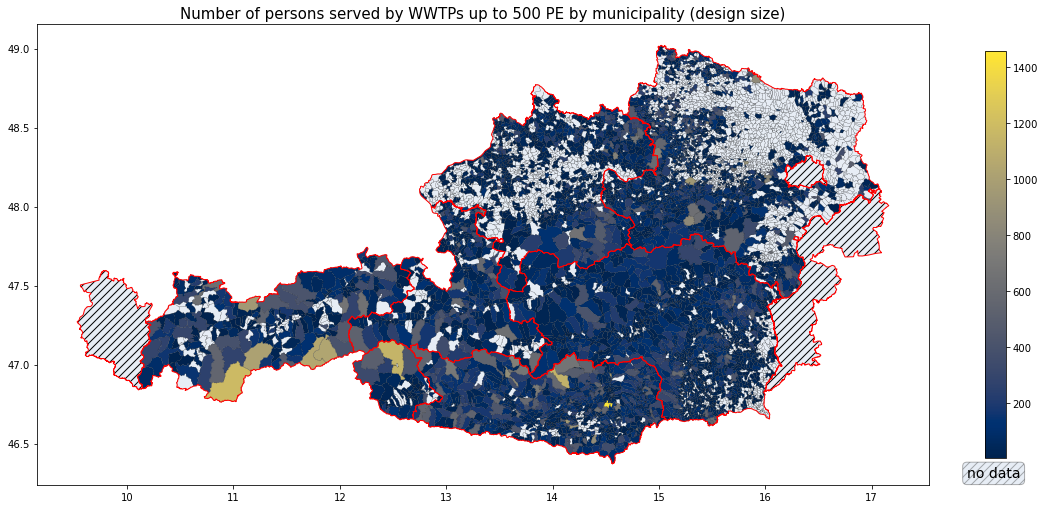

In [9]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of persons served by WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data[data.sum_PE_tot>0].plot(column='sum_PE_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/all_PE.png', bbox_inches='tight' )

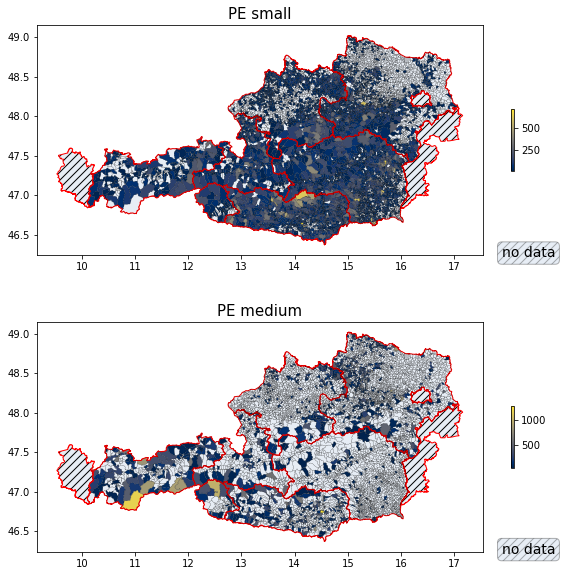

In [38]:
#plot for PE
fig,ax=plt.subplots(2,1,figsize=(10,10))


for axe in ax:
    basemap.plot(color='lightsteelblue',ax=axe, alpha=0.3)
    no_data.plot(hatch='///',ax=axe,alpha=0.3,color='lightsteelblue')
    #print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)
    props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
    fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=axe.transAxes)
    #plot KG boundaries
    basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=axe)


ax[0].set_title('PE small', fontsize=15)
ax[1].set_title('PE medium', fontsize=15)

data[data.sum_PE_small>0].plot(column='sum_PE_small',cmap='cividis', ax=ax[0], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good
data[data.sum_PE_medium>0].plot(column='sum_PE_medium',cmap='cividis', ax=ax[1], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

plt.savefig('plots/PE_both.png', bbox_inches='tight' )


In [10]:
#percentage of non-nitriin total
data.PE_nonitri.sum()/data.sum_PE.sum()*100





19.005327206766054

# NON-NITRIFYING


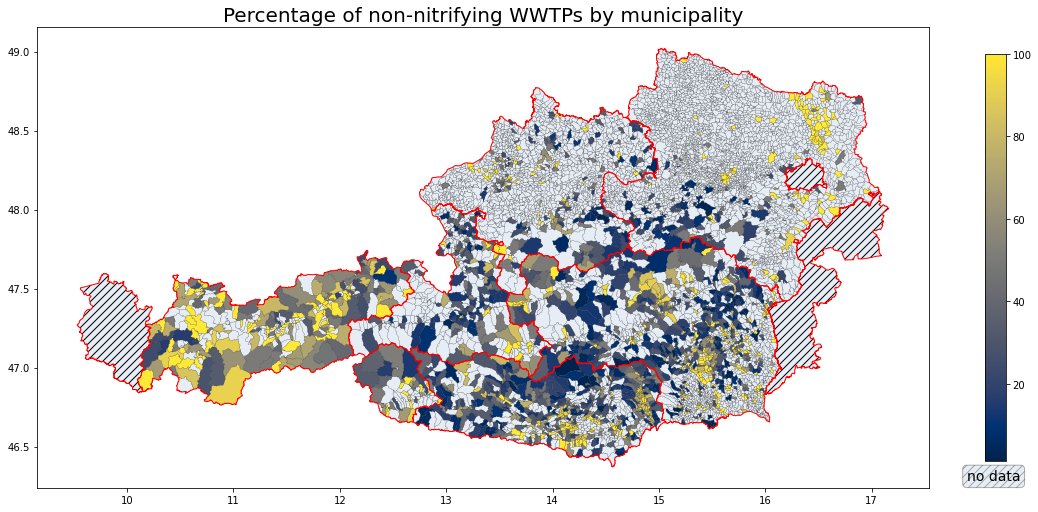

In [91]:
#plot for old infrastructure density. 
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')

data[data['%no_nitri_tot']>0].plot(column='%no_nitri_tot', ax=ax,legend=True,cmap='cividis',missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})

ax.set_title('Percentage of non-nitrifying WWTPs by municipality', fontsize=20)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)



plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )

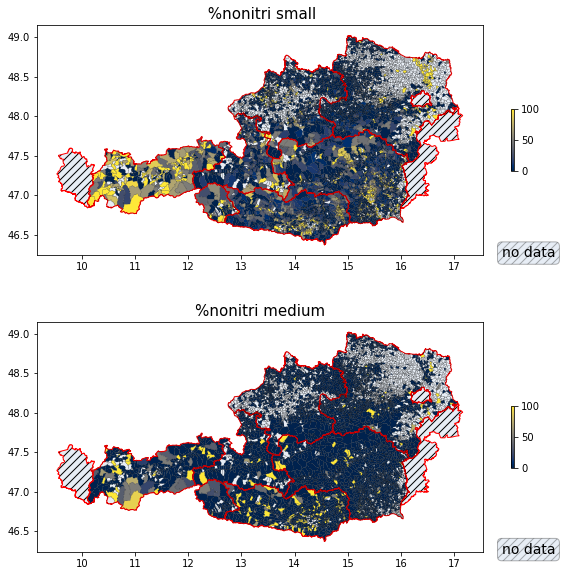

In [33]:
fig,ax=plt.subplots(2,1,figsize=(10,10))


for axe in ax:
    basemap.plot(color='lightsteelblue',ax=axe, alpha=0.3)
    no_data.plot(hatch='///',ax=axe,alpha=0.3,color='lightsteelblue')
    #print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)
    props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
    fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=axe.transAxes)
    #plot KG boundaries
    basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=axe)


ax[0].set_title(' %nonitri small', fontsize=15)
ax[1].set_title('%nonitri medium', fontsize=15)

data.plot(column='%no_nitri_small',cmap='cividis', ax=ax[0], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good
data.plot(column='%no_nitri_medium',cmap='cividis', ax=ax[1], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

plt.savefig('plots/nonitri%_both.png', bbox_inches='tight' )


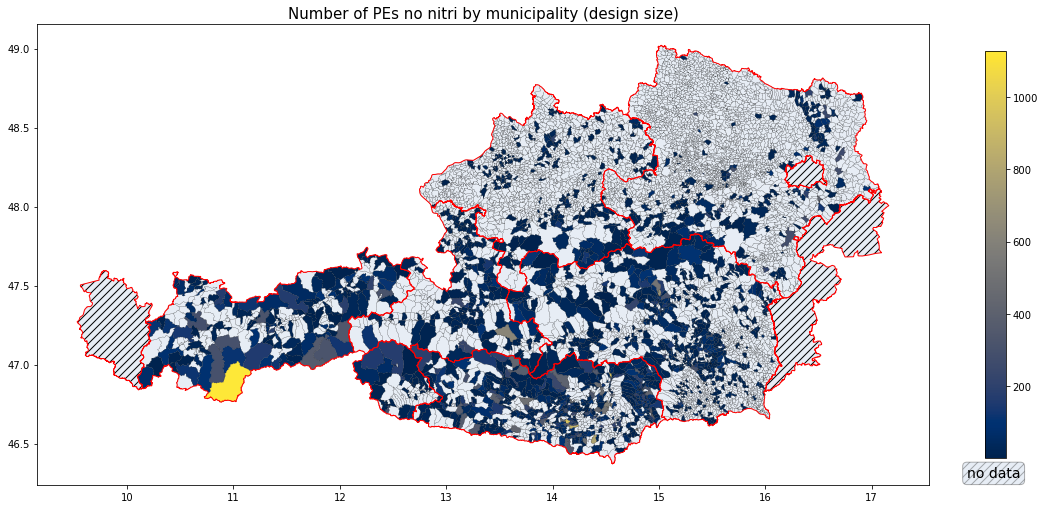

In [46]:
#plot for PE nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of PEs no nitri by municipality (design size)', fontsize=15)
data[data.PE_nonitri_tot>0].plot(column='PE_nonitri_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/PE_nonitri_tot.png', bbox_inches='tight' )

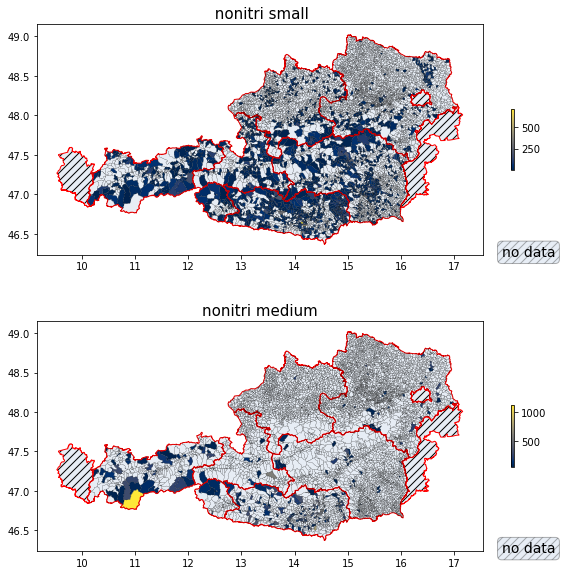

In [34]:
#plot for nonitri
fig,ax=plt.subplots(2,1,figsize=(10,10))


for axe in ax:
    basemap.plot(color='lightsteelblue',ax=axe, alpha=0.3)
    no_data.plot(hatch='///',ax=axe,alpha=0.3,color='lightsteelblue')
    #print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=axe)
    props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
    fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=axe.transAxes)
    #plot KG boundaries
    basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=axe)


ax[0].set_title(' nonitri small', fontsize=15)
ax[1].set_title('nonitri medium', fontsize=15)

data[data.PE_nonitri_small>0].plot(column='PE_nonitri_small',cmap='cividis', ax=ax[0], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good
data[data.PE_nonitri_medium>0].plot(column='PE_nonitri_medium',cmap='cividis', ax=ax[1], legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

plt.savefig('plots/both_nonitri.png', bbox_inches='tight' )

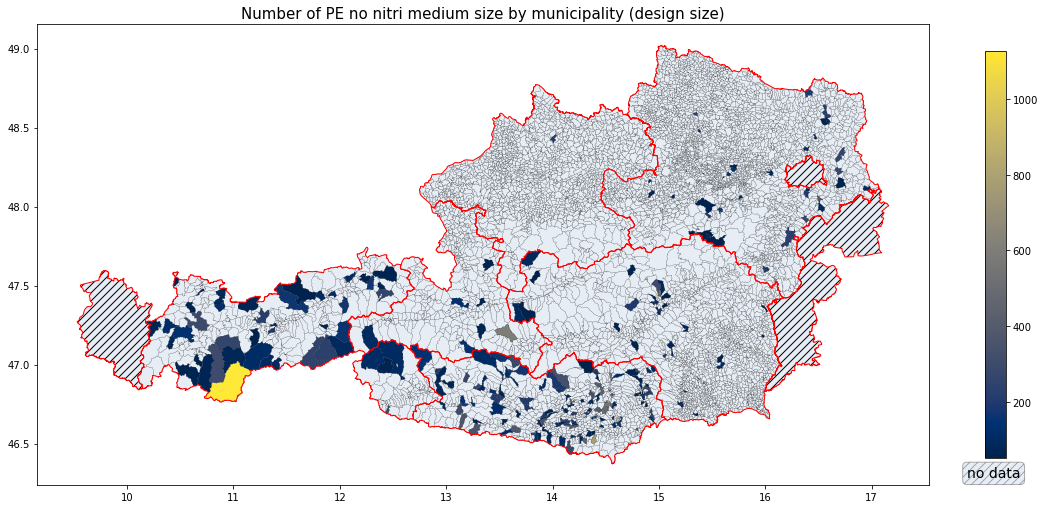

In [35]:
#plot for PE nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of PE no nitri medium size by municipality (design size)', fontsize=15)
data[data.PE_nonitri_medium>0].plot(column='PE_nonitri_medium',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/PE_medium.png', bbox_inches='tight' )

In [59]:
data.PE_nonitri_medium.sort_values(ascending=False)
data.sort_values('PE_nonitri_medium', ascending=False)[['PE_nonitri_medium', 'PE_nonitri_small', 'PE_nonitri_tot',
       'freq_medium', 'freq_small', 'freq_tot', 'no_nitri_medium',
       'no_nitri_small', 'no_nitri_tot', 'sum_PE_medium', 'sum_PE_small','sum_PE_tot']]


PE_nonitri_medium  PE_nonitri_small  PE_nonitri_tot  freq_medium  \
2076        1128.000000          0.000000     1128.000000         11.0   
1603         780.000000         13.333333      793.333333          2.0   
2324         600.000000         22.666667      622.666667          1.0   
1461         573.333333        371.333333      944.666667          2.0   
1654         552.000000         30.333333      582.333333          6.0   
...                 ...               ...             ...          ...   
1479           0.000000          0.000000        0.000000          0.0   
1480           0.000000          6.666667        6.666667          0.0   
1481           0.000000          0.000000        0.000000          0.0   
1482           0.000000         48.000000       48.000000          0.0   
4404           0.000000          0.000000        0.000000          0.0   

      freq_small  freq_tot  no_nitri_medium  no_nitri_small  no_nitri_tot  \
2076         1.0      12.0             10.0             1.0          11.0   
1603        11.0      13.0              2.0             1.0           3.0   
2324         2.0       3.0              1.0             1.0           2.0   
1461        28.0      30.0              2.0            25.0          27.0   
1654        23.0      29.0              4.0             3.0           7.0   
...          ...       ...              ...             ...           ...   
1479         1.0       1.0              0.0             0.0           0.0   
1480         6.0       6.0              0.0             1.0           1.0   
1481         1.0       1.0              0.0             0.0           0.0   
1482        16.0      16.0              0.0            15.0          15.0   
4404        12.0      12.0              0.0             0.0           0.0   

      sum_PE_medium  sum_PE_small   sum_PE_tot  
2076    1180.000000      0.000000  1180.000000  
1603     780.000000     79.666667   859.666667  
2324     600.000000     27.666667   627.666667  
1461     573.333333    387.333333   960.666667  
1654    1292.000000    167.000000  1459.000000  
...             ...           ...          ...  
1479       0.000000     10.666667    10.666667  
1480       0.000000     66.666667    66.666667  
1481       0.000000      4.800000     4.800000  
1482       0.000000     53.333333    53.333333  
4404       0.000000    130.000000   130.000000  

[4405 rows x 12 columns]

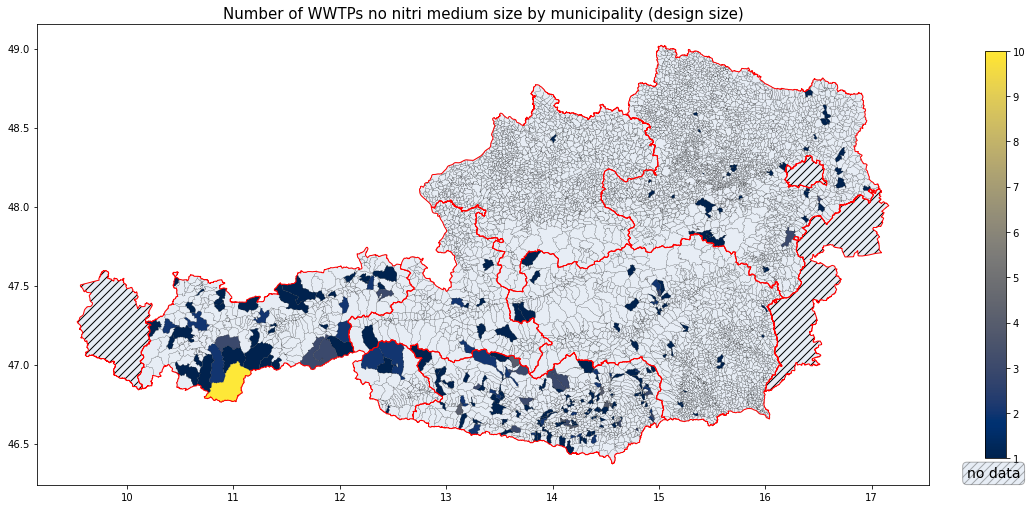

In [53]:
#plot for PE nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of WWTPs no nitri medium size by municipality (design size)', fontsize=15)
data[data.no_nitri_medium>0].plot(column='no_nitri_medium',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/nonitri_medium.png', bbox_inches='tight' )

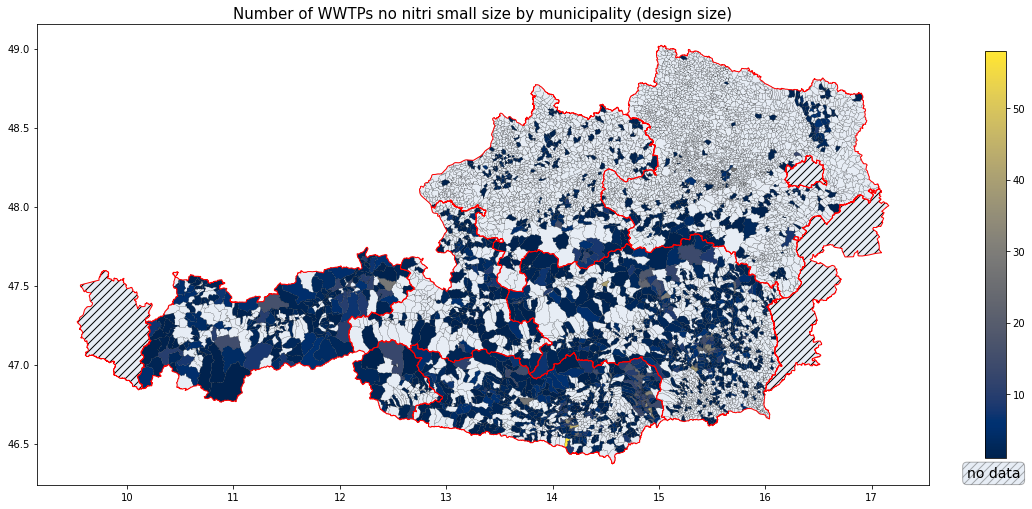

In [43]:
#plot for PE nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of WWTPs no nitri small size by municipality (design size)', fontsize=15)
data[data.no_nitri_small>0].plot(column='no_nitri_small',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/nonitri_small.png', bbox_inches='tight' )

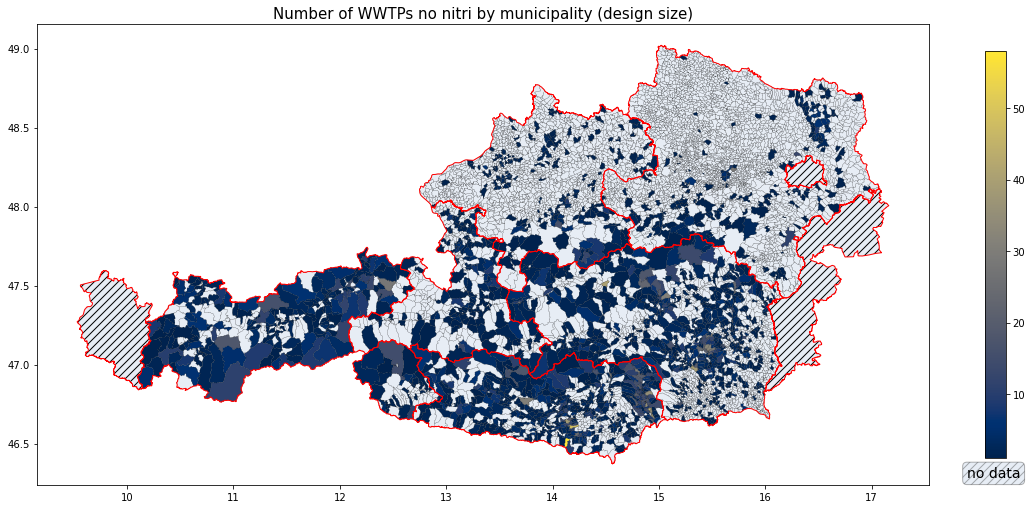

In [44]:
#plot for freq nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of WWTPs no nitri by municipality (design size)', fontsize=15)
data[data.no_nitri_tot>0].plot(column='no_nitri_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/nonitri_tot.png', bbox_inches='tight' )

In [ ]:
#plot for PE nonitri
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of WWTPs no nitri by municipality (design size)', fontsize=15)
data[data.no_nitri_tot>0].plot(column='no_nitri_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/nonitri_tot.png', bbox_inches='tight' )

# PE on POP

C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


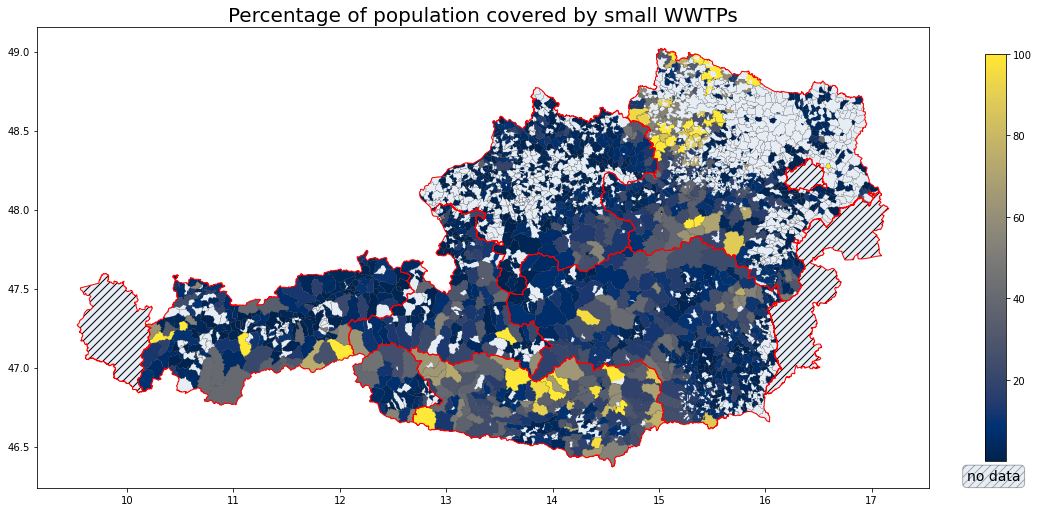

In [7]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')

to_plot=data_pop[data_pop['%PEonpop']>0]
to_plot.loc[to_plot['%PEonpop']>100, '%PEonpop']=100
to_plot.plot(column='%PEonpop', ax=ax,legend=True,cmap='cividis',missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})
plt.title('percentage of population covered by small'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ[(GKZ.BL!='Wien')&(GKZ.BL!='Vorarlberg')&(GKZ.BL!='Burgenland')].geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)


plt.savefig('plots/all_PE_pop.png', bbox_inches='tight' )

# NOnitri PE on POP 


C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


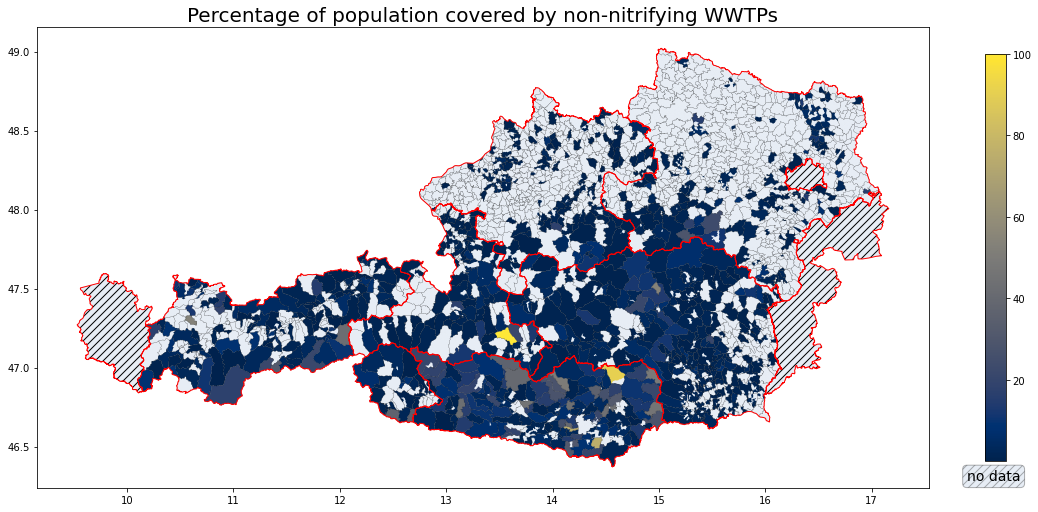

In [8]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')

to_plot=data_pop[data_pop['%nonitriPEonpop']>0]
to_plot.loc[to_plot['%nonitriPEonpop']>100, '%nonitriPEonpop']=100
to_plot.plot(column='%nonitriPEonpop', ax=ax,legend=True,cmap='cividis',missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})
ax.set_title('percentage of population covered by non-nitrifying'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ[(GKZ.BL!='Wien')&(GKZ.BL!='Vorarlberg')&(GKZ.BL!='Burgenland')].geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)


plt.savefig('plots/all_nonitri%_pop.png', bbox_inches='tight' )

Text(1.042, 0.04, 'no data')

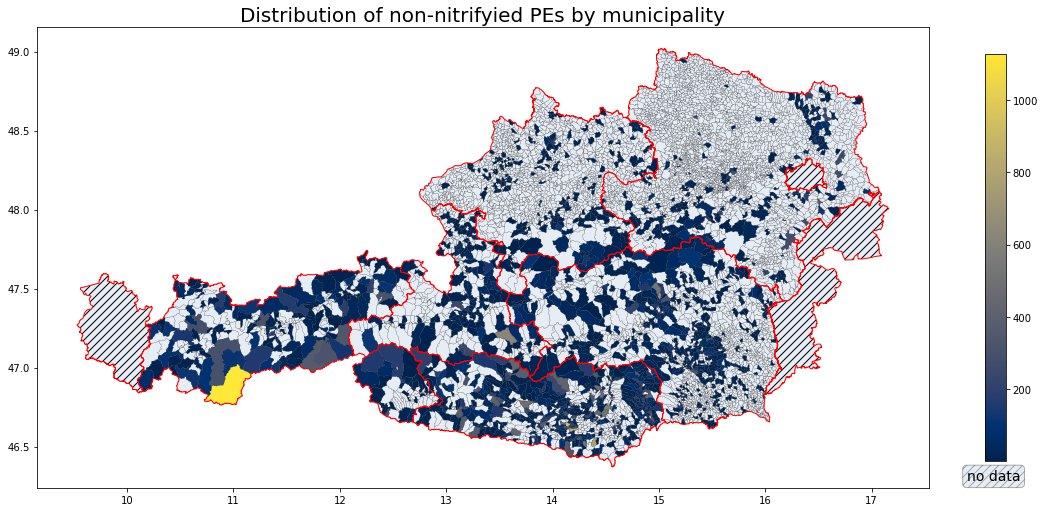

In [101]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')

data[data.PE_nonitri_tot>0].plot(column='PE_nonitri_tot', ax=ax,legend=True,cmap='cividis',legend_kwds={'shrink': 0.25})
ax.set_title('Distribution of non-nitrifyied PEs by municipality', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

#plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )


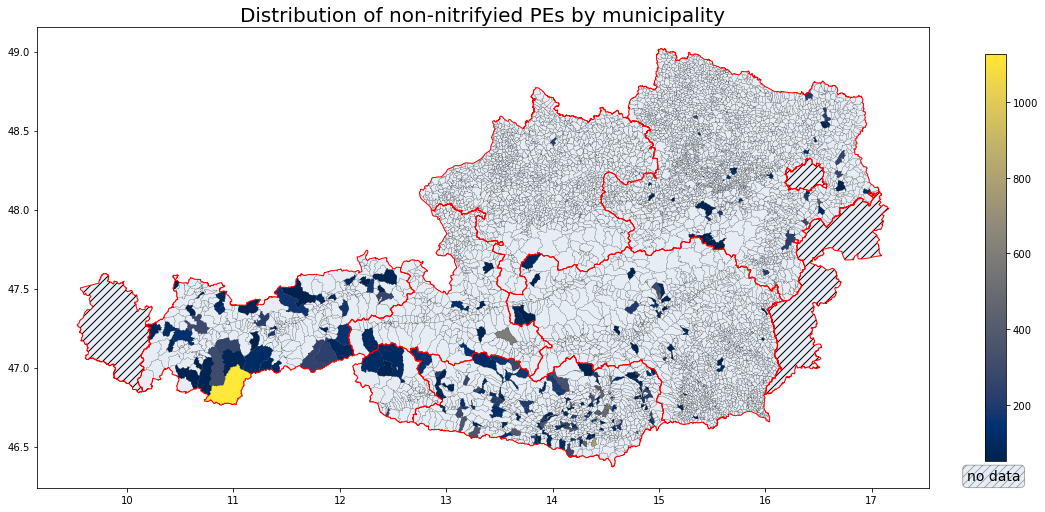

In [37]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')

data[data.PE_nonitri_medium>0].plot(column='PE_nonitri_medium', ax=ax,legend=True,cmap='cividis',legend_kwds={'shrink': 0.25})
ax.set_title('Distribution of non-nitrifyied PEs by municipality', fontsize=20)

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

plt.savefig('plots/PE_nonitri_medium.png', bbox_inches='tight' )


2 parameters as potentiol of environmental impact : PE sum and size of KG
given this, only carintia shows potential
maybe add further geo analisys on impact
like water bodies in vicinity

In [15]:
distri=data[['KG','PE_nonitri']]

# chase outlaws

In [10]:
#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *

# for tirol no way of investigating of data true. no name nor code in original data


In [12]:
outlaw=geopandas.read_file('half-way/outlaw_tirol.geojson')

In [ ]:
outlaw=data[(data.PE>50)&(data.year>1991) ]

# goal is here to understnad the distribution of nonitri PE
### if widely distributed should be no problem

In [16]:
distri.PE_nonitri.max()

947.6666666666666

<AxesSubplot:ylabel='Frequency'>

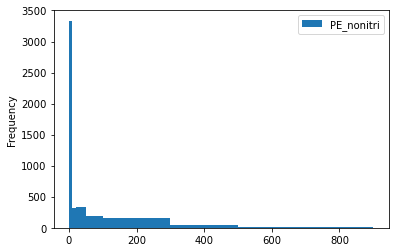

In [17]:
distri.plot(kind='hist', y='PE_nonitri', bins=[0,10,20,50,100,300,500,900])

<AxesSubplot:ylabel='Density'>

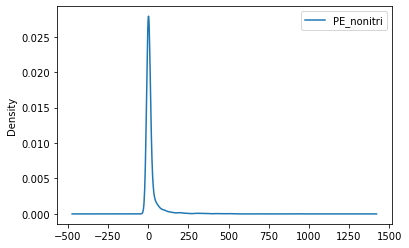

In [18]:
distri.plot(kind='kde',y='PE_nonitri')

In [19]:
data.PE_nonitri.mean()

18.04628450106157